In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,learning_curve,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,IsolationForest,RandomForestRegressor,AdaBoostClassifier,VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor,KNeighborsClassifier
from sklearn.decomposition import PCA  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

In [36]:
ml_data = pd.read_csv('hcvdat0.csv')
ml_data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [37]:
# Removing Unnamed:0 , as it an unnecssary index column from the csvfile
ml_data.drop(['Unnamed: 0'], axis=1 ,inplace=True)

In [38]:
# Checking datatype of attributes
ml_data.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [39]:
ml_data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [40]:
# Convert Category
ml_data['Category'] = ml_data['Category'].map({
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 2,
    '3=Cirrhosis': 3
}).astype(int)

#Convert Sex
ml_data.Sex = ml_data.Sex.apply(lambda x: 0 if x == 'm' else 1)

In [41]:
# Checking missing values 
ml_data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [42]:
num_of_sex = ml_data.Sex.value_counts()
num_of_sex

0    377
1    238
Name: Sex, dtype: int64

In [43]:
num_of_category = ml_data.Category.value_counts()
num_of_category

0    540
3     30
1     24
2     21
Name: Category, dtype: int64

In [44]:
num_of_sex_by_category = ml_data.groupby('Category').Sex.value_counts()
num_of_sex_by_category

Category  Sex
0         0      324
          1      216
1         0       20
          1        4
2         0       13
          1        8
3         0       20
          1       10
Name: Sex, dtype: int64

In [45]:
mean_age_by_category = ml_data.groupby('Category').Age.mean()
mean_age_by_category

Category
0    47.266667
1    38.708333
2    52.333333
3    53.466667
Name: Age, dtype: float64

In [46]:
#Mean Alkaline phophatase levels by category 
mean_ALP_by_category = ml_data.groupby('Category').ALP.mean()
mean_ALP_by_category

Category
0    68.869815
1    42.114286
2    37.841667
3    93.220833
Name: ALP, dtype: float64

In [47]:
#Mean Albumin levels by category 
mean_ALB_by_category = ml_data.groupby('Category').ALB.mean()
mean_ALB_by_category

Category
0    42.007037
1    43.833333
2    41.761905
3    32.482759
Name: ALB, dtype: float64

In [48]:
#Mean Alanine transaminase levels by category
mean_ALT_by_category = ml_data.groupby('Category').ALT.mean()
mean_ALT_by_category


Category
0    27.61
1    26.90
2    59.60
3    22.97
Name: ALT, dtype: float64

In [49]:
#Mean aspartate aminotransferase levels by category
mean_AST_by_category = ml_data.groupby('Category').AST.mean()
mean_AST_by_category

Category
0     27.125370
1     75.733333
2     81.171429
3    107.456667
Name: AST, dtype: float64

In [50]:
#Mean Bilirubin levels by category
mean_BIL_by_category = ml_data.groupby('Category').BIL.mean()
mean_BIL_by_category

Category
0     8.477778
1    15.625000
2    13.428571
3    59.133333
Name: BIL, dtype: float64

In [51]:
#Mean Cholinsterase levels by category
mean_CHE_by_category = ml_data.groupby('Category').CHE.mean()
mean_CHE_by_category

Category
0    8.386185
1    9.283750
2    8.334762
3    3.818333
Name: CHE, dtype: float64

In [52]:
#Mean cholesterol levels by category 
mean_CHOL_by_category = ml_data.groupby('Category').CHOL.mean()
mean_CHOL_by_category

Category
0    5.480619
1    5.099167
2    4.595500
3    4.008571
Name: CHOL, dtype: float64

In [53]:
#Mean creatinine by category
mean_CREA_by_category = ml_data.groupby('Category').CREA.mean()
mean_CREA_by_category

Category
0     78.753704
1     73.958333
2     73.490476
3    138.223333
Name: CREA, dtype: float64

In [54]:
#Mean Gamma-glutamyltransferase level by category
mean_GGT_by_category = ml_data.groupby('Category').GGT.mean()
mean_GGT_by_category

Category
0     30.624444
1     92.579167
2     79.552381
3    129.440000
Name: GGT, dtype: float64

In [55]:
#Mean total protein levels by category
mean_PROT_by_category = ml_data.groupby('Category').PROT.mean()
mean_PROT_by_category

Category
0    71.875370
1    74.700000
2    76.100000
3    70.051724
Name: PROT, dtype: float64

In [56]:
ml_data['ALB'] = ml_data['ALB'].fillna(ml_data.groupby('Category')['ALB'].transform('mean'))
ml_data['ALP'] = ml_data['ALP'].fillna(ml_data.groupby('Category')['ALP'].transform('mean'))
ml_data['ALT'] = ml_data['ALT'].fillna(ml_data.groupby('Category')['ALT'].transform('mean'))
ml_data['CHOL'] = ml_data['CHOL'].fillna(ml_data.groupby('Category')['CHOL'].transform('mean'))
ml_data['PROT'] = ml_data['PROT'].fillna(ml_data.groupby('Category')['PROT'].transform('mean'))

In [57]:
# Checking missing values 
ml_data.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [58]:
# Viewing missing data from which class
ml_data.iloc[603]

Category      3.000000
Age          65.000000
Sex           0.000000
ALB          32.482759
ALP          93.220833
ALT          40.000000
AST          54.000000
BIL          13.000000
CHE           7.500000
CHOL          4.008571
CREA         70.000000
GGT         107.000000
PROT         79.000000
Name: 603, dtype: float64

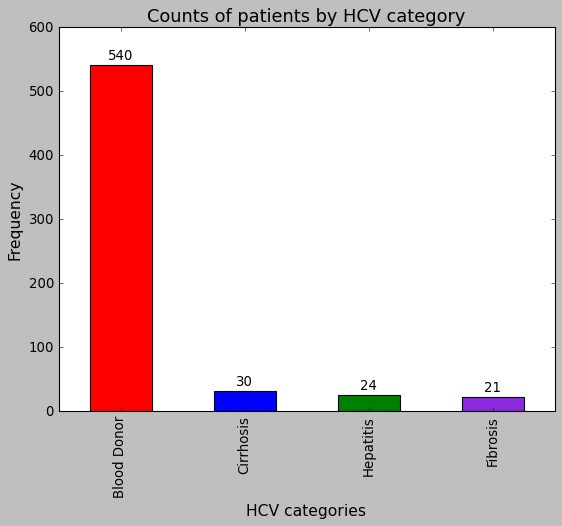

In [59]:
# Checking the frequency of each class
ax = ml_data['Category'].value_counts().plot(kind='bar', color=['red', 'blue', 'green', 'blueviolet'],
                                              fontsize=12, figsize=(8, 6))

ax.set_title('Counts of patients by HCV category', fontsize=16)
plt.xticks(range(4), ['Blood Donor', 'Cirrhosis', 'Hepatitis', 'Fibrosis'])
ax.set_xlabel("HCV categories", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

# Add value labels on top of each bar
for i, value in enumerate(ml_data['Category'].value_counts()):
    ax.text(i, value + 10, str(value), ha='center', fontsize=12)  # Position the text above the bar

plt.savefig('category.png')
plt.show()


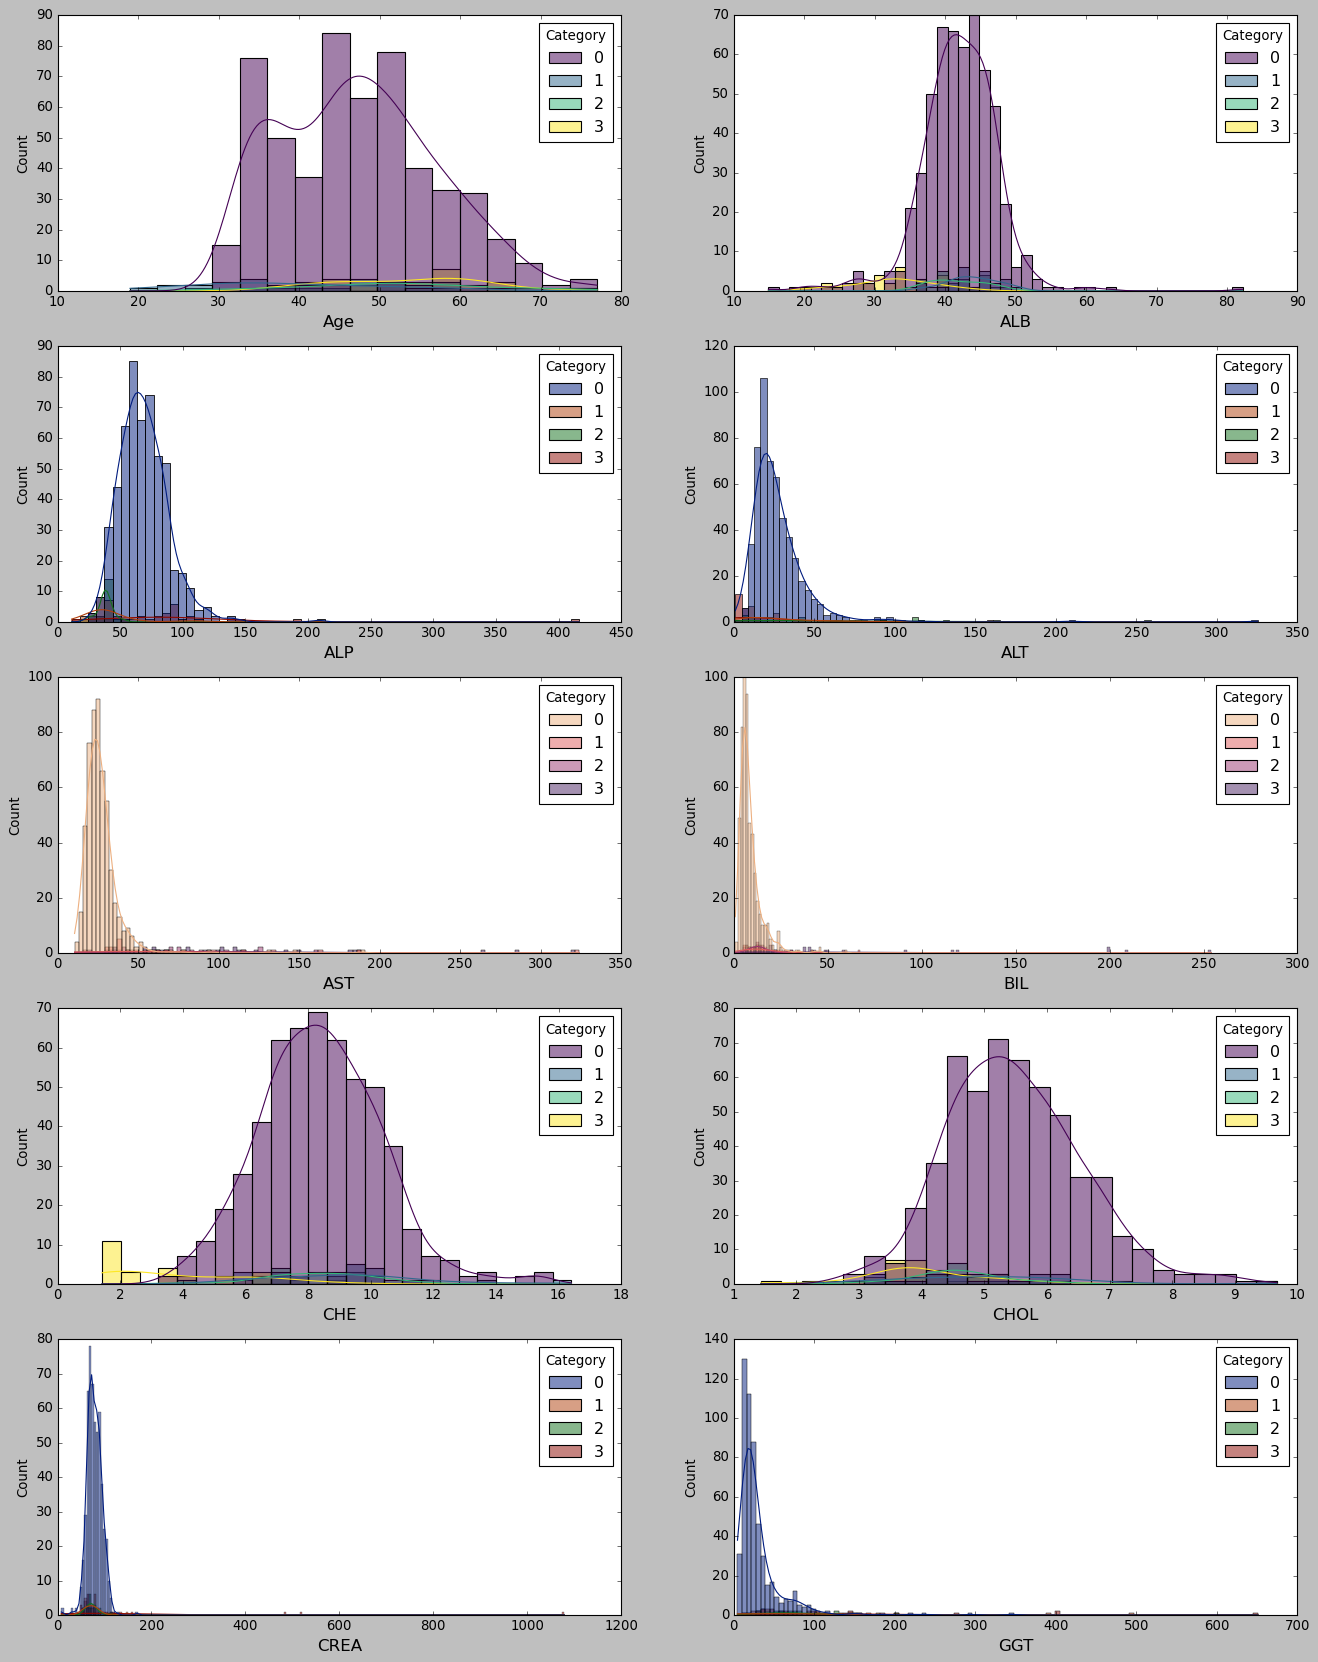

In [60]:
fig, ax = plt.subplots(5,2, figsize=(20,25)) 
plt.style.use("classic")


sns.histplot(x = ml_data["Age"], hue = ml_data["Category"], palette="viridis", kde=True, ax=ax[0,0])
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = ml_data["ALB"], hue = ml_data["Category"], palette="viridis", kde=True, ax=ax[0,1])
ax[0,1].set_xlabel("ALB",fontsize=15)

sns.histplot(x = ml_data["ALP"], hue = ml_data["Category"], palette="dark", kde=True, ax=ax[1,0])
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = ml_data["ALT"], hue = ml_data["Category"], palette="dark", kde=True, ax=ax[1,1])
ax[1,1].set_xlabel("ALT",fontsize=15)

sns.histplot(x = ml_data["AST"], hue = ml_data["Category"], palette="flare", kde=True, ax=ax[2,0])
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = ml_data["BIL"], hue = ml_data["Category"], palette="flare", kde=True, ax=ax[2,1])
ax[2,1].set_xlabel("BIL",fontsize=15)

sns.histplot(x = ml_data["CHE"], hue = ml_data["Category"], palette="viridis", kde=True, ax=ax[3,0])
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = ml_data["CHOL"], hue = ml_data["Category"], palette="viridis", kde=True, ax=ax[3,1])
ax[3,1].set_xlabel("CHOL",fontsize=15)

sns.histplot(x = ml_data["CREA"], hue = ml_data["Category"], palette="dark", kde=True, ax=ax[4,0])
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = ml_data["GGT"], hue = ml_data["Category"], palette="dark", kde=True, ax=ax[4,1])
ax[4,1].set_xlabel("GGT",fontsize=15)

plt.savefig('dist.png')

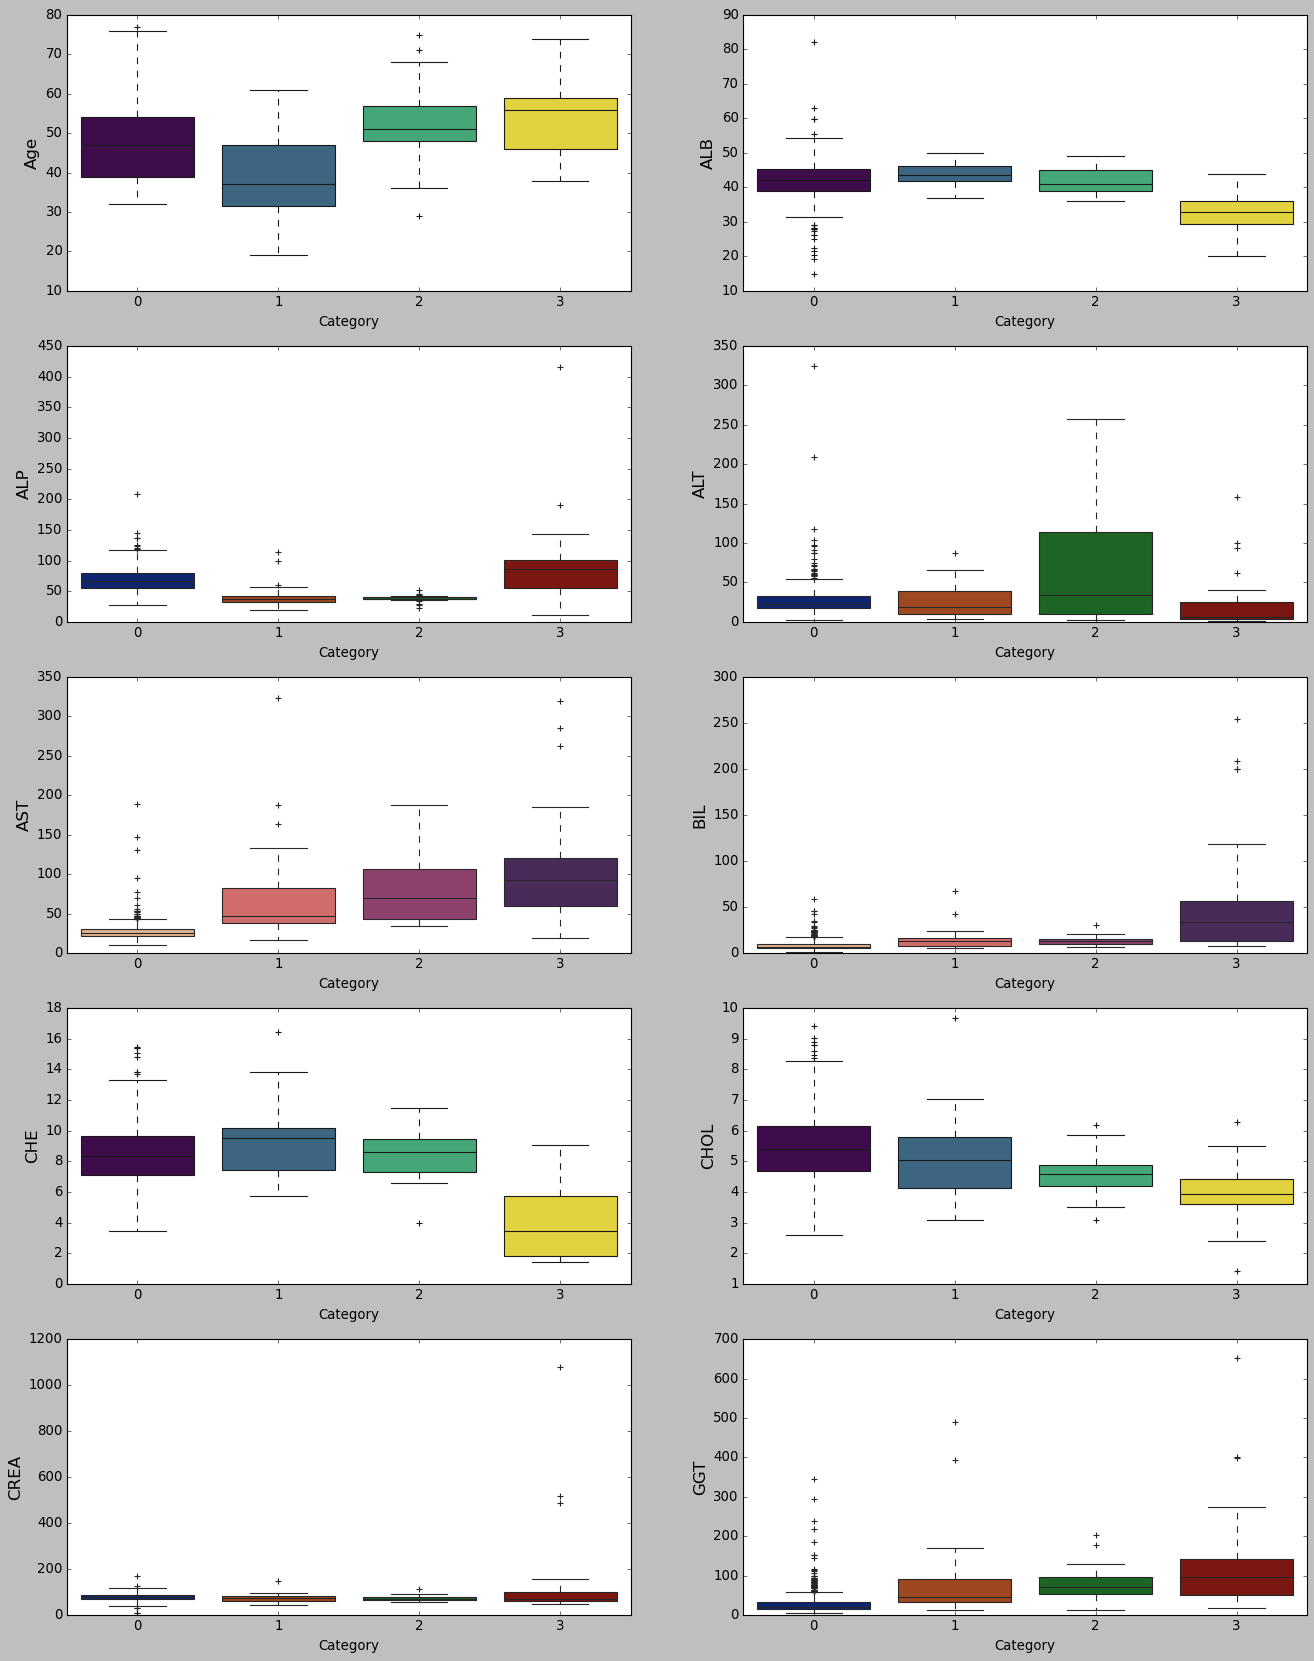

In [61]:
fig, ax = plt.subplots(5, 2, figsize=(20, 25)) 
plt.style.use("classic")

sns.boxplot(x="Category", y="Age", data=ml_data, palette="viridis", hue="Category", ax=ax[0,0])
ax[0,0].set_ylabel("Age", fontsize=15)
ax[0,0].legend_.remove()

sns.boxplot(x="Category", y="ALB", data=ml_data, palette="viridis", hue="Category", ax=ax[0,1])
ax[0,1].set_ylabel("ALB", fontsize=15)
ax[0,1].legend_.remove()

sns.boxplot(x="Category", y="ALP", data=ml_data, palette="dark", hue="Category", ax=ax[1,0])
ax[1,0].set_ylabel("ALP", fontsize=15)
ax[1,0].legend_.remove()

sns.boxplot(x="Category", y="ALT", data=ml_data, palette="dark", hue="Category", ax=ax[1,1])
ax[1,1].set_ylabel("ALT", fontsize=15)
ax[1,1].legend_.remove()

sns.boxplot(x="Category", y="AST", data=ml_data, palette="flare", hue="Category", ax=ax[2,0])
ax[2,0].set_ylabel("AST", fontsize=15)
ax[2,0].legend_.remove()

sns.boxplot(x="Category", y="BIL", data=ml_data, palette="flare", hue="Category", ax=ax[2,1])
ax[2,1].set_ylabel("BIL", fontsize=15)
ax[2,1].legend_.remove()

sns.boxplot(x="Category", y="CHE", data=ml_data, palette="viridis", hue="Category", ax=ax[3,0])
ax[3,0].set_ylabel("CHE", fontsize=15)
ax[3,0].legend_.remove()

sns.boxplot(x="Category", y="CHOL", data=ml_data, palette="viridis", hue="Category", ax=ax[3,1])
ax[3,1].set_ylabel("CHOL", fontsize=15)
ax[3,1].legend_.remove()

sns.boxplot(x="Category", y="CREA", data=ml_data, palette="dark", hue="Category", ax=ax[4,0])
ax[4,0].set_ylabel("CREA", fontsize=15)
ax[4,0].legend_.remove()

sns.boxplot(x="Category", y="GGT", data=ml_data, palette="dark", hue="Category", ax=ax[4,1])
ax[4,1].set_ylabel("GGT", fontsize=15)
ax[4,1].legend_.remove()


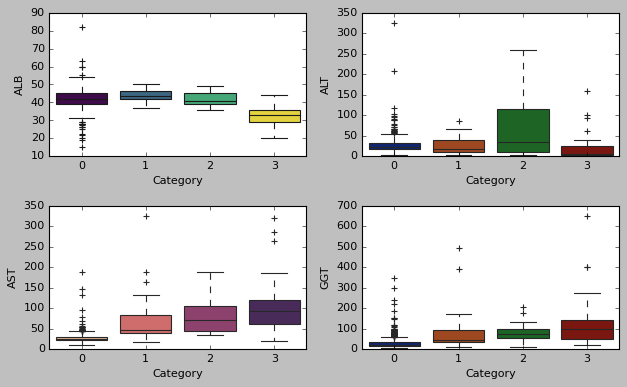

In [62]:
# Create a single plot with 2 rows and 2 columns for ALB, ALT, AST, and GGT
fig, ax = plt.subplots(2, 2, figsize=(8, 5))
plt.style.use("classic")

# Boxplot for ALB
sns.boxplot(x="Category", y="ALB", data=ml_data, palette="viridis", hue="Category", ax=ax[0, 0])
ax[0, 0].set_ylabel("ALB", fontsize=10)
ax[0, 0].set_xlabel("Category", fontsize=10)
ax[0, 0].tick_params(axis='both', labelsize=10)
ax[0, 0].legend_.remove()

# Boxplot for ALT
sns.boxplot(x="Category", y="ALT", data=ml_data, palette="dark", hue="Category", ax=ax[0, 1])
ax[0, 1].set_ylabel("ALT", fontsize=10)
ax[0, 1].set_xlabel("Category", fontsize=10)
ax[0, 1].tick_params(axis='both', labelsize=10)
ax[0, 1].legend_.remove()

# Boxplot for AST
sns.boxplot(x="Category", y="AST", data=ml_data, palette="flare", hue="Category", ax=ax[1, 0])
ax[1, 0].set_ylabel("AST", fontsize=10)
ax[1, 0].set_xlabel("Category", fontsize=10)
ax[1, 0].tick_params(axis='both', labelsize=10)
ax[1, 0].legend_.remove()

# Boxplot for GGT
sns.boxplot(x="Category", y="GGT", data=ml_data, palette="dark", hue="Category", ax=ax[1, 1])
ax[1, 1].set_ylabel("GGT", fontsize=10)
ax[1, 1].set_xlabel("Category", fontsize=10)
ax[1, 1].tick_params(axis='both', labelsize=10)
ax[1, 1].legend_.remove()

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('boxplot_ALB_ALT_AST_GGT.png')
plt.show()


In [63]:
from sklearn.preprocessing import RobustScaler

data_without_categories = ml_data[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
labels = ml_data[['Category']]


scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_without_categories)

scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'])
print(scaled_df)

          Age  Sex       ALB        ALP       ALT       AST       BIL  \
0   -1.000000  0.0 -0.531250  -0.479574 -0.918919 -0.336283  0.033898   
1   -1.000000  0.0 -0.531250   0.152753 -0.300300 -0.106195 -0.576271   
2   -1.000000  0.0  0.781250   0.309059  0.792793  2.362832 -0.203390   
3   -1.000000  0.0  0.203125  -0.497336  0.456456 -0.292035  1.966102   
4   -1.000000  0.0 -0.421875   0.287744  0.576577 -0.097345  0.389831   
..        ...  ...       ...        ...       ...       ...       ...   
610  1.000000  1.0 -1.546875  12.454707 -1.027027  7.469027  7.237288   
611  1.133333  1.0 -2.796875   1.307282 -1.207207  1.637168  2.152542   
612  1.133333  1.0 -2.015625   0.756661 -1.171171  6.469027  6.898305   
613 -0.066667  1.0 -1.390625   0.966992  0.960961  3.194690  2.152542   
614  0.800000  1.0 -0.921875   0.966992  4.624625  4.787611  0.796610   

          CHE      CHOL      CREA        GGT      PROT  
0   -0.500942 -1.427586  1.380952  -0.457143 -0.524590  
1    1.09

In [64]:
data_pca = PCA(n_components=12) # Do 12 components at first and then can choose which to keep later
components = data_pca.fit(scaled_df).components_ # Creating dummy variable so we can see which components we want to include before changing the actual dataset
components = pd.DataFrame(components).transpose() 
components.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10', 'Comp11', 'Comp12']
components.index =  data_without_categories.columns
components

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11,Comp12
Age,0.017241,-0.019605,-0.000636,0.048363,-0.062189,-0.108627,0.299812,-0.211440,0.671055,0.538053,-0.320563,0.064354
Sex,-0.020578,0.009739,-0.030571,0.003310,-0.067304,-0.062602,0.042084,0.110189,0.180082,-0.290880,0.074035,0.923933
ALB,-0.067822,-0.005753,0.002108,-0.014216,0.152034,0.597599,-0.174941,0.182936,0.000016,0.560131,0.453874,0.176361
ALP,0.040749,-0.047382,0.092718,0.248347,-0.010686,-0.091067,0.643868,0.682850,-0.158579,0.085357,0.026658,-0.058483
ALT,0.069063,-0.225954,-0.035394,0.124451,0.906773,-0.297036,-0.095191,0.021755,0.072096,0.008059,0.029440,0.036098
AST,0.583907,-0.588466,-0.140064,-0.511606,-0.093138,0.060380,0.124853,0.008922,-0.032743,0.007917,0.046161,0.012137
BIL,0.724642,0.670595,-0.031664,0.055465,0.123590,0.052103,0.023970,-0.030068,-0.019772,0.015683,-0.001677,0.031777
CHE,-0.076192,-0.042311,0.006015,0.042018,0.188547,0.324592,0.341182,-0.392704,-0.545272,0.119694,-0.454753,0.246219
CHOL,-0.047506,-0.007587,-0.000388,0.105444,0.100094,0.228328,0.514179,-0.424995,0.227550,-0.355302,0.528142,-0.149873
CREA,0.035790,0.014475,0.962451,-0.254111,0.068266,-0.006966,0.000404,-0.027887,0.030000,-0.019796,0.004039,0.028805


In [65]:
var_ratio = data_pca.explained_variance_ratio_ # Find the amount of variance explained by each components
var_ratio= pd.DataFrame(var_ratio).transpose() # Transposes the data to make it easier to read
var_ratio.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10', 'Comp11', 'Comp12']
var_ratio.index = ['Proportion of Variance']
var_ratio

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11,Comp12
Proportion of Variance,0.391963,0.206294,0.156684,0.085104,0.055509,0.036496,0.019617,0.01425,0.011258,0.009433,0.008393,0.004998


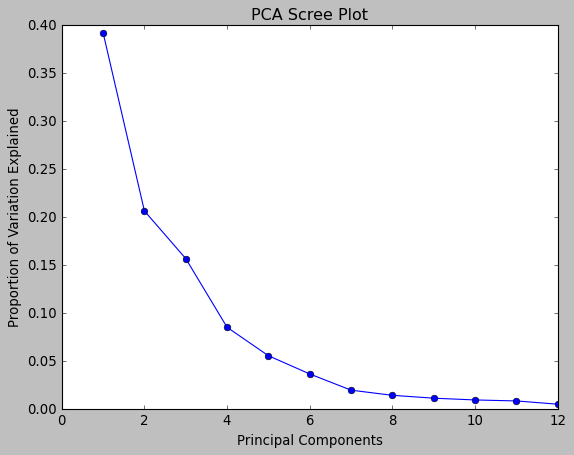

In [66]:
len_columns = len(components.columns)
x_axis = list(range(1, len_columns+1))
var_ratio = data_pca.explained_variance_ratio_ # Find the amount of variance explained by each components
plt.plot(x_axis, var_ratio, '-o')
plt.title('PCA Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variation Explained')

plt.savefig('pca.png')
plt.show()

In [67]:
data_pcomp = data_pca.fit_transform(scaled_data)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp = data_pcomp.iloc[:,0:11]
data_pcomp.columns = ['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9', 'Comp10', 'Comp11']
data_pcomp.head()

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11
0,-1.443303,1.036128,1.092390,-1.113002,-1.095886,-0.742256,-1.257592,0.460470,-0.928360,-0.119592,-0.342635
1,-1.871659,0.136287,-0.333142,-0.378082,-0.152211,0.523506,0.081330,0.235165,-1.198009,-0.731374,-1.002736
2,0.145052,-1.573318,-0.028409,-1.080590,0.684263,1.255906,-0.189297,0.878505,-0.508980,-0.364238,0.077691
3,0.210982,1.590053,-0.052423,0.209762,0.550864,0.431087,-1.173513,0.310718,-0.349283,-0.458550,0.008716
4,-0.824900,0.419901,-0.154452,0.190185,0.267216,-0.663652,-0.376745,0.316333,-1.307109,-0.108228,-0.194170


In [68]:
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(scaled_df)
print(f"Number of components chosen: {pca.n_components_}")

# data_pcomp based on cumulative varaince 
data_pcomp = data_pcomp.iloc[:,0:7]
data_pcomp.head()

Number of components chosen: 7


,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7
0,-1.443303,1.036128,1.092390,-1.113002,-1.095886,-0.742256,-1.257592
1,-1.871659,0.136287,-0.333142,-0.378082,-0.152211,0.523506,0.081330
2,0.145052,-1.573318,-0.028409,-1.080590,0.684263,1.255906,-0.189297
3,0.210982,1.590053,-0.052423,0.209762,0.550864,0.431087,-1.173513
4,-0.824900,0.419901,-0.154452,0.190185,0.267216,-0.663652,-0.376745


In [69]:
# data_pcomp2 based on scree plot (3 components)
data_pcomp2 = data_pcomp.iloc[:,0:3]
data_pcomp2.head()

,Comp1,Comp2,Comp3
0,-1.443303,1.036128,1.092390
1,-1.871659,0.136287,-0.333142
2,0.145052,-1.573318,-0.028409
3,0.210982,1.590053,-0.052423
4,-0.824900,0.419901,-0.154452


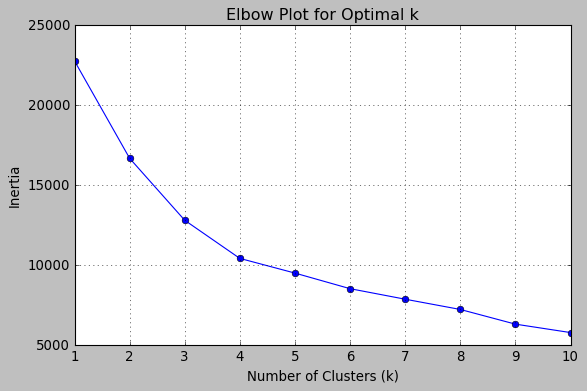

In [70]:
inertia = []


# Try k from 1 to, say, 10
K = range(1, 11)


for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)


# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal k')
plt.grid(True)
plt.savefig('elbow_k.png')
plt.show()

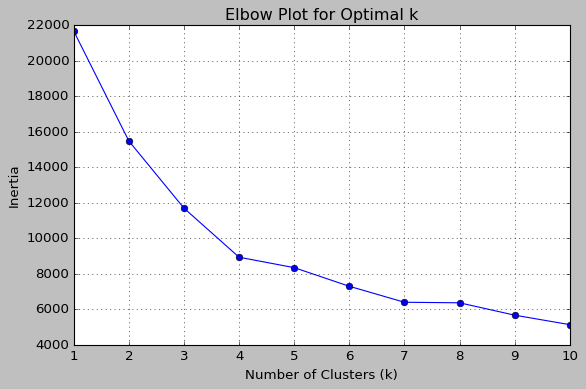

In [208]:
inertia = []


# Try k from 1 to, say, 10
K = range(1, 11)


for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pcomp)
    inertia.append(kmeans.inertia_)


# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal k')
plt.grid(True)
plt.show()

In [213]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, davies_bouldin_score
import numpy as np

def evaluate_kmeans_summary(X, true_labels, n_clusters, n_runs=30):
    true_labels = np.ravel(true_labels)  # Ensure 1D

    ari_scores = []
    nmi_scores = []
    sil_scores = []
    inertias = []
    db_scores = []

    best_sil_score = -1
    best_run = {}

    for _ in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=None)
        labels = kmeans.fit_predict(X)

        # Metrics
        ari = adjusted_rand_score(true_labels, labels)
        nmi = normalized_mutual_info_score(true_labels, labels)
        sil = silhouette_score(X, labels)
        inertia = kmeans.inertia_
        db = davies_bouldin_score(X, labels)

        # Store metrics
        ari_scores.append(ari)
        nmi_scores.append(nmi)
        sil_scores.append(sil)
        inertias.append(inertia)
        db_scores.append(db)

        # Track best run by silhouette score
        if sil > best_sil_score:
            best_sil_score = sil
            best_run = {
                'labels': labels,
                'cluster_centers': kmeans.cluster_centers_,
                'cluster_sizes': np.bincount(labels),
                'inertia': inertia,
                'silhouette_score': sil,
                'davies_bouldin': db
            }

    results = {}

    # Store means and standard deviations
    results['mean_ARI'] = np.round(np.mean(ari_scores), 3)
    results['std_ARI'] = np.round(np.std(ari_scores), 3)
    results['mean_NMI'] = np.round(np.mean(nmi_scores), 3)
    results['std_NMI'] = np.round(np.std(nmi_scores), 3)
    results['mean_Silhouette'] = np.round(np.mean(sil_scores), 3)
    results['std_Silhouette'] = np.round(np.std(sil_scores), 3)
    results['mean_Inertia'] = np.round(np.mean(inertias), 2)
    results['std_Inertia'] = np.round(np.std(inertias), 2)
    results['mean_Davies_Bouldin'] = np.round(np.mean(db_scores), 2)
    results['std_Davies_Bouldin'] = np.round(np.std(db_scores), 2)

    # Best run details (shortened for readability)
    results['best_run'] = {
        'labels': best_run['labels'][:10],
        'cluster_sizes': best_run['cluster_sizes'],
        'cluster_centers': np.round(best_run['cluster_centers'], 3),
        'inertia': np.round(best_run['inertia'], 2),
        'silhouette_score': np.round(best_run['silhouette_score'], 3),
        'davies_bouldin': np.round(best_run['davies_bouldin'], 2)
    }

    return results

# Run and store the result
results = evaluate_kmeans_summary(scaled_df, labels, n_clusters=4, n_runs=10)

# Output
print("### K-Means++ Clustering Summary with scaled_df ###")
print("\n**Performance Metrics (Averaged Across 30 Runs):**")
print(f"Mean Inertia: {results['mean_Inertia']} ± {results['std_Inertia']}")
print(f"Mean Silhouette Score: {results['mean_Silhouette']} ± {results['std_Silhouette']}")
print(f"Mean ARI: {results['mean_ARI']} ± {results['std_ARI']}")
print(f"Mean NMI: {results['mean_NMI']} ± {results['std_NMI']}")
print(f"Mean DBI: {results['mean_Davies_Bouldin']} ± {results['std_Davies_Bouldin']}")

print("\n**Best Run (Highest Silhouette Score):**")
print(f"Cluster Labels (First 10): {results['best_run']['labels']}")
print(f"Cluster Sizes: {results['best_run']['cluster_sizes']}")
print(f"Best Inertia: {results['best_run']['inertia']}")
print(f"Best Silhouette Score: {results['best_run']['silhouette_score']}")
print(f"Best DBI Score: {results['best_run']['davies_bouldin']}")





### K-Means++ Clustering Summary with scaled_df ###

**Performance Metrics (Averaged Across 30 Runs):**
Mean Inertia: 10183.16 ± 185.5
Mean Silhouette Score: 0.71 ± 0.002
Mean ARI: 0.976 ± 0.013
Mean NMI: 0.956 ± 0.02
Mean DBI: 0.79 ± 0.06

**Best Run (Highest Silhouette Score):**
Cluster Labels (First 10): [0 0 0 0 0 0 0 0 0 0]
Cluster Sizes: [575  31   3   6]
Best Inertia: 10031.71
Best Silhouette Score: 0.712
Best DBI Score: 0.84


In [202]:
# Run and store the result
results1 = evaluate_kmeans_summary(data_pcomp, labels, n_clusters=4, n_runs=10)

# Output
print("### K-Means++ Clustering Summary with data_pcomp ###")
print("\n**Performance Metrics (Averaged Across 30 Runs):**")
print(f"Mean Inertia: {results1['mean_Inertia']} ± {results1['std_Inertia']}")
print(f"Mean Silhouette Score: {results1['mean_Silhouette']} ± {results1['std_Silhouette']}")
print(f"Mean ARI: {results1['mean_ARI']} ± {results1['std_ARI']}")
print(f"Mean NMI: {results1['mean_NMI']} ± {results1['std_NMI']}")
print(f"Mean DBI: {results1['mean_Davies_Bouldin']} ± {results1['std_Davies_Bouldin']}")

print("\n**Best Run (Highest Silhouette Score):**")
print(f"Cluster Labels (First 10): {results1['best_run']['labels']}")
print(f"Cluster Sizes: {results1['best_run']['cluster_sizes']}")
print(f"Best Inertia: {results1['best_run']['inertia']}")
print(f"Best Silhouette Score: {results1['best_run']['silhouette_score']}")
print(f"Best DBI Score: {results1['best_run']['davies_bouldin']}")

### K-Means++ Clustering Summary with data_pcomp ###

**Performance Metrics (Averaged Across 30 Runs):**
Mean Inertia: 8976.15 ± 114.05
Mean Silhouette Score: 0.739 ± 0.001
Mean ARI: 0.987 ± 0.008
Mean NMI: 0.975 ± 0.013
Mean DBI: 0.81 ± 0.03

**Best Run (Highest Silhouette Score):**
Cluster Labels (First 10): [1 1 1 1 1 1 1 1 1 1]
Cluster Sizes: [ 31 574   7   3]
Best Inertia: 8940.3
Best Silhouette Score: 0.74
Best DBI Score: 0.83


In [205]:
# Run and store the result
results1 = evaluate_kmeans_summary(data_pcomp2, labels, n_clusters=4, n_runs=10)

# Output
print("### K-Means++ Clustering Summary with data_pcomp2 ###")
print("\n**Performance Metrics (Averaged Across 30 Runs):**")
print(f"Mean Inertia: {results1['mean_Inertia']} ± {results1['std_Inertia']}")
print(f"Mean Silhouette Score: {results1['mean_Silhouette']} ± {results1['std_Silhouette']}")
print(f"Mean ARI: {results1['mean_ARI']} ± {results1['std_ARI']}")
print(f"Mean NMI: {results1['mean_NMI']} ± {results1['std_NMI']}")
print(f"Mean DBI: {results1['mean_Davies_Bouldin']} ± {results1['std_Davies_Bouldin']}")

print("\n**Best Run (Highest Silhouette Score):**")
print(f"Cluster Labels (First 10): {results1['best_run']['labels']}")
print(f"Cluster Sizes: {results1['best_run']['cluster_sizes']}")
print(f"Best Inertia: {results1['best_run']['inertia']}")
print(f"Best Silhouette Score: {results1['best_run']['silhouette_score']}")
print(f"Best DBI Score: {results1['best_run']['davies_bouldin']}")

### K-Means++ Clustering Summary with data_pcomp2 ###

**Performance Metrics (Averaged Across 30 Runs):**
Mean Inertia: 4570.54 ± 0.4
Mean Silhouette Score: 0.798 ± 0.001
Mean ARI: 0.992 ± 0.007
Mean NMI: 0.983 ± 0.014
Mean DBI: 0.57 ± 0.01

**Best Run (Highest Silhouette Score):**
Cluster Labels (First 10): [0 0 0 0 0 0 0 0 0 0]
Cluster Sizes: [574  31   7   3]
Best Inertia: 4570.05
Best Silhouette Score: 0.798
Best DBI Score: 0.59


In [ ]:
kmeans = KMeans(n_clusters=4).fit(data_pcomp2)
labels = kmeans.labels_

# Check Cluster Assignments
ml_data['cluster'] = labels
print(ml_data)

     Category  Age  Sex   ALB         ALP    ALT    AST   BIL    CHE  CHOL  \
0           0   32    0  38.5   52.500000    7.7   22.1   7.5   6.93  3.23   
1           0   32    0  38.5   70.300000   18.0   24.7   3.9  11.17  4.80   
2           0   32    0  46.9   74.700000   36.2   52.6   6.1   8.84  5.20   
3           0   32    0  43.2   52.000000   30.6   22.6  18.9   7.33  4.74   
4           0   32    0  39.2   74.100000   32.6   24.8   9.6   9.15  4.32   
..        ...  ...  ...   ...         ...    ...    ...   ...    ...   ...   
610         3   62    1  32.0  416.600000    5.9  110.3  50.0   5.57  6.30   
611         3   64    1  24.0  102.800000    2.9   44.4  20.0   1.54  3.02   
612         3   64    1  29.0   87.300000    3.5   99.0  48.0   1.66  3.63   
613         3   46    1  33.0   93.220833   39.0   62.0  20.0   3.56  4.20   
614         3   59    1  36.0   93.220833  100.0   80.0  12.0   9.07  5.30   

      CREA    GGT  PROT  cluster  
0    106.0   12.1  69.0     

In [211]:
# Analyze Feature Statistics Per Cluster
cluster_summary = ml_data.groupby('cluster').mean()
print(cluster_summary)

         Category        Age       Sex        ALB         ALP        ALT  \
cluster                                                                    
0        0.114983  47.141115  0.397213  42.023141   66.928182  27.110627   
1        3.000000  44.666667  0.333333  34.000000  146.033333   2.766667   
2        1.935484  51.903226  0.258065  37.387097   79.007930  59.374194   
3        3.000000  50.571429  0.142857  29.285714   69.660119  12.185714   

                AST         BIL       CHE      CHOL        CREA         GGT  \
cluster                                                                       
0         28.055923    8.798432  8.384634  5.424395   78.243554   31.548258   
1         30.366667    9.000000  5.890000  4.246667  694.666667  117.000000   
2        150.387097   23.925806  6.307742  4.683726   77.396774  170.635484   
3         76.628571  170.000000  2.134286  3.876939   85.271429   80.500000   

              PROT  
cluster             
0        72.095819  
1    

In [212]:
pd.crosstab(ml_data['cluster'], ml_data['Category'])

Category,0,1,2,3
cluster,,,,
0,536,17,14,7
1,0,0,0,3
2,4,7,7,13
3,0,0,0,7
